In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import plotly as ply
import seaborn as sns
import squarify

In [ ]:
MainPathFile = '/content/drive/My Drive/Colab Notebooks/API_19_DS2_en_excel_v2_6002116.xls'
GDBPathFile =  "/content/drive/My Drive/Colab Notebooks/API_NY.GDP.MKTP.CD_DS2_en_excel_v2_5994847.xls"
GDBPathFilecap = "/content/drive/My Drive/Colab Notebooks/API_NY.GDP.PCAP.CD_DS2_en_excel_v2_5994922.xls"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
def populate_data(main_data_file, gdp_file, gdp_cap_file):

    # Read data file and extracts all sheets from it
    captured_data = pd.read_excel(main_data_file, header=3)
    df_gdp = pd.read_excel(gdp_file, header=3)
    df_gdp_cap = pd.read_excel(gdp_cap_file, header=3)
    countries_metadata = pd.read_excel(main_data_file, sheet_name='Metadata - Countries')
    df_indicator_metadata = pd.read_excel(main_data_file, sheet_name='Metadata - Indicators')

    # Merg columns from Data and Country Meta_Data
    captured_data_merged = pd.merge(captured_data, countries_metadata, on='Country Code', how='inner')
    captured_data_merged = pd.concat([captured_data_merged, df_gdp, df_gdp_cap], axis=0).sort_values(by='Country Name', ascending=True)
    captured_data_merged = captured_data_merged.reset_index()

    # Filling in NaN Regions and Income_Groups with respective values
    region_list = {}
    income_list = {}
    for country_name in countries_metadata['TableName'].unique():
        region_list[country_name] = countries_metadata[countries_metadata['TableName'] == country_name]['Region'].unique()[0]
        income_list[country_name] = countries_metadata[countries_metadata['TableName'] == country_name]['IncomeGroup'].unique()[0]

    for country_name, region in region_list.items():
        captured_data_merged.loc[captured_data_merged['Country Name'] == country_name, 'Region'] = region
        captured_data_merged.loc[captured_data_merged['Country Name'] == country_name, 'IncomeGroup'] = region

    # Sorting Columns out, changing column positions to start of df and also removing unwanted columns
    columns_list = captured_data_merged.columns.tolist()
    columns_list.insert(4, columns_list.pop(captured_data_merged.columns.get_loc('Region')))
    columns_list.insert(5, columns_list.pop(captured_data_merged.columns.get_loc('IncomeGroup')))
    captured_data_merged = captured_data_merged[columns_list]
    captured_data_merged = captured_data_merged.drop(columns=['SpecialNotes', 'TableName', 'index'], axis=1)

    # Setting Multi_level Index for df (countries)
    countries = captured_data_merged.set_index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Indicator Code', 'Indicator Name'])

    # Filter out columns based on Indicators to focus on
    countries = countries[countries.index.get_level_values('Indicator Code').isin(['SP.POP.TOTL','SP.POP.GROW','SP.URB.TOTL.IN.ZS','NV.AGR.TOTL.ZS','EN.ATM.GHGT.ZG','EN.ATM.GHGT.KT.CE','EG.USE.PCAP.KG.OE','EG.USE.ELEC.KH.PC','EG.ELC.PETR.ZS','EG.ELC.NGAS.ZS','EG.ELC.COAL.ZS','EG.ELC.ACCS.ZS','AG.LND.FRST.ZS','AG.LND.FRST.K2','AG.LND.AGRI.ZS','NY.GDP.MKTP.CD','NY.GDP.PCAP.CD'])]

    # Filter out countries of interest
    countries = countries[countries.index.get_level_values('Country Name').isin(['India','China','Bangladesh','Australia','New Zealand','Nigeria','Egypt, Arab Rep.','South Africa','Brazil','Colombia','Argentina','Canada','United States','Germany','Spain','Austria'])]

    # This is where the function to output two dataframes ends
    df_year = countries.T

    return countries, df_year


In [ ]:
dfCountry, dfYear = populate_data(MainPathFile,GDBPathFile,GDBPathFilecap)

In [ ]:
dfCountry.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,9.900000e+01,1.310000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,...,2.560000e+02,2.560000e+02,2.310000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.750000e+02,1.580000e+02,9.300000e+01
mean,7.709391e+09,5.969832e+09,6.441808e+09,6.826205e+09,7.445078e+09,7.903645e+09,8.525369e+09,8.956154e+09,9.665037e+09,1.056238e+10,...,1.647427e+11,1.720511e+11,1.880985e+11,2.512035e+11,2.691216e+11,2.871448e+11,2.940569e+11,2.906992e+11,3.697700e+11,6.616754e+11
std,5.503711e+10,4.957288e+10,5.282260e+10,5.577085e+10,5.996440e+10,6.411375e+10,7.017175e+10,7.414831e+10,8.103404e+10,8.773028e+10,...,1.253676e+12,1.319619e+12,1.431624e+12,1.675817e+12,1.773529e+12,1.905076e+12,1.972069e+12,1.971173e+12,2.367729e+12,3.252105e+12
min,0.000000e+00,-1.015528e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-3.276690e-01,-2.989511e-01,-7.758886e-02,4.518559e-02,4.518559e-02,4.518559e-02,4.518559e-02,4.518559e-02,4.232706e-02,-1.309950e-02
25%,2.541206e+01,8.620593e+00,8.958631e+00,1.054843e+01,1.191194e+01,1.290416e+01,1.235290e+01,1.254973e+01,1.194562e+01,1.297440e+01,...,1.426747e+01,1.441606e+01,1.101312e+01,3.260357e+01,3.255576e+01,3.254964e+01,3.254403e+01,3.327480e+01,2.542965e+01,7.299998e+00
50%,3.963923e+02,6.966800e+01,7.075700e+01,7.130700e+01,7.189100e+01,7.187900e+01,7.224700e+01,7.261200e+01,7.297400e+01,7.333300e+01,...,8.535550e+01,8.575100e+01,7.437333e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,9.076450e+01,2.388621e+03
75%,1.610406e+07,3.648981e+03,4.433606e+03,4.690486e+03,4.903608e+03,5.153932e+03,5.272665e+03,5.557292e+03,5.871520e+03,6.091100e+03,...,5.120714e+04,5.116359e+04,1.063281e+05,6.277771e+05,6.640407e+05,6.607749e+05,6.399375e+05,6.345642e+05,2.671366e+05,8.407981e+07
max,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,9.425000e+11,1.019900e+12,...,1.684319e+13,1.755068e+13,1.820602e+13,1.869511e+13,1.947734e+13,2.053306e+13,2.138098e+13,2.106047e+13,2.331508e+13,2.546270e+13


In [ ]:
dfYear.describe()

Country Name                                               Argentina  \
Country Code                                                     ARG   
Region                                     Latin America & Caribbean   
IncomeGroup                                Latin America & Caribbean   
Indicator Code                                     EN.ATM.GHGT.KT.CE   
Indicator Name Total greenhouse gas emissions (kt of CO2 equivalent)   
count                                                   31.000000      
mean                                                320056.291423      
std                                                  44536.005728      
min                                                 249188.761200      
25%                                                 282561.885300      
50%                                                 325978.731700      
75%                                                 359652.891400      
max                                                 379420.274600      

Country Name                                                        \
Country Code                                                         
Region                                                               
IncomeGroup                                                          
Indicator Code                                      EN.ATM.GHGT.ZG   
Indicator Name Total greenhouse gas emissions (% change from 1990)   
count                                                   22.000000    
mean                                                    24.454583    
std                                                     16.692169    
min                                                      0.237739    
25%                                                      9.212680    
50%                                                     24.803021    
75%                                                     39.611279    
max                                                     54.378490    

Country Name                                                         \
Country Code                                                          
Region                                                                
IncomeGroup                                                           
Indicator Code                                       EG.ELC.PETR.ZS   
Indicator Name Electricity production from oil sources (% of total)   
count                                                   45.000000     
mean                                                    20.293401     
std                                                     18.564029     
min                                                      0.898725     
25%                                                      7.064350     
50%                                                     14.208455     
75%                                                     23.434288     
max                                                     68.145894     

Country Name                                                 \
Country Code                                                  
Region                                                        
IncomeGroup                                                   
Indicator Code                            EG.USE.PCAP.KG.OE   
Indicator Name Energy use (kg of oil equivalent per capita)   
count                                             44.000000   
mean                                            1583.687156   
std                                              195.822049   
min                                             1365.233040   
25%                                             1428.643555   
50%                                             1497.065294   
75%                                             1673.603440   
max                                             2029.922825   

Country Name                                                \
Country Code                                                 
Region  

In [ ]:
#Creating TimeSeries for 'GDP (current US$)'. now  i create a sub df (time_series_ts) using the dfCountry output from the function
rowLabels =  pd.IndexSlice[:,:,:,:,('NY.GDP.MKTP.CD'),:]
time_series_ts = dfCountry.loc[rowLabels, :]

In [ ]:
time_series_ts = time_series_ts.reset_index()

In [ ]:
time_series_ts.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,...,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01
mean,5.858054e+10,6.002696e+10,6.107396e+10,6.472296e+10,7.059949e+10,7.206383e+10,7.773941e+10,8.167116e+10,8.814279e+10,9.633553e+10,...,2.635635e+12,2.752566e+12,2.715418e+12,2.762983e+12,2.960079e+12,3.158331e+12,3.234362e+12,3.179257e+12,3.651214e+12,3.845723e+12
std,1.466634e+11,1.520135e+11,1.572866e+11,1.659752e+11,1.780725e+11,1.870251e+11,2.051096e+11,2.169035e+11,2.374426e+11,2.567396e+11,...,4.446623e+12,4.693314e+12,4.909806e+12,5.036033e+12,5.310365e+12,5.715715e+12,5.935353e+12,5.939397e+12,6.774784e+12,7.197649e+12
min,4.031153e+09,4.467288e+09,4.909399e+09,4.836167e+09,5.386055e+09,4.948668e+09,5.278006e+09,5.203238e+09,5.180598e+09,5.761589e+09,...,1.499905e+11,1.728854e+11,1.780645e+11,1.888383e+11,2.065563e+11,2.118867e+11,2.130920e+11,2.125698e+11,2.555517e+11,2.472341e+11
25%,5.485855e+09,5.670064e+09,6.497150e+09,7.072747e+09,7.748104e+09,5.890587e+09,6.403303e+09,6.607497e+09,6.721949e+09,7.552662e+09,...,3.961879e+11,3.812304e+11,3.423740e+11,3.302277e+11,3.597760e+11,3.866687e+11,3.792080e+11,3.813389e+11,4.232577e+11,4.686003e+11
50%,1.207213e+10,1.383430e+10,1.768515e+10,1.867352e+10,2.115379e+10,2.246552e+10,2.730784e+10,2.425667e+10,2.643686e+10,3.125628e+10,...,9.538023e+11,9.730022e+11,8.954531e+11,8.820476e+11,9.784369e+11,9.732613e+11,9.333680e+11,8.560940e+11,9.573039e+11,1.015140e+12
75%,3.702988e+10,3.923244e+10,3.773376e+10,3.959422e+10,4.343478e+10,4.142991e+10,3.729326e+10,4.089103e+10,4.350796e+10,4.780982e+10,...,2.010746e+12,2.143356e+12,1.877556e+12,1.920469e+12,2.210505e+12,2.113433e+12,2.113868e+12,1.903598e+12,2.288692e+12,2.451152e+12
max,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,9.425000e+11,1.019900e+12,...,1.684319e+13,1.755068e+13,1.820602e+13,1.869511e+13,1.947734e+13,2.053306e+13,2.138098e+13,2.106047e+13,2.331508e+13,2.546270e+13


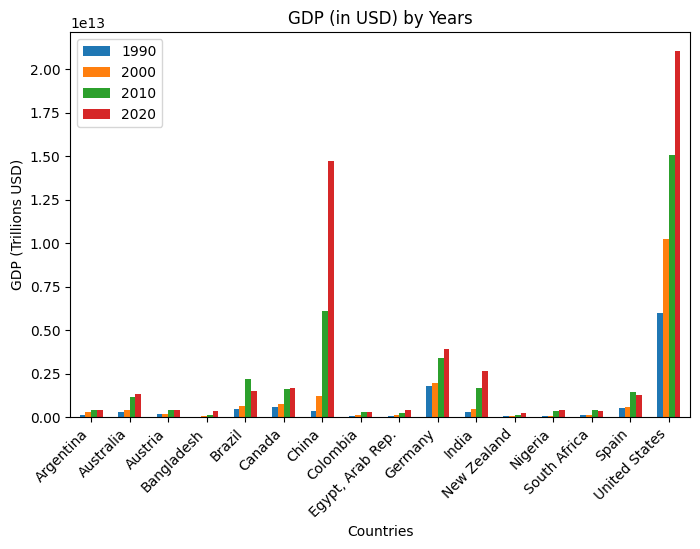

In [ ]:
#GDP for each country by years plot

dfGDP = pd.melt(time_series_ts,id_vars=['Country Name','Indicator Name'],value_vars=[str(x) for x in range(1990,2021,10)])
dfGDP.pivot(index='Country Name',columns='variable',values='value').plot(kind='bar',width=0.6,figsize=(8,5) )

plt.xlabel('Countries')
plt.ylabel('GDP (Trillions USD)')
plt.title('GDP (in USD) by Years')
plt.xticks(rotation=45, ha='right')

plt.legend()
# plt.grid(True)
# plt.show()
plt.savefig('gdp_by_country.png',bbox_inches='tight')

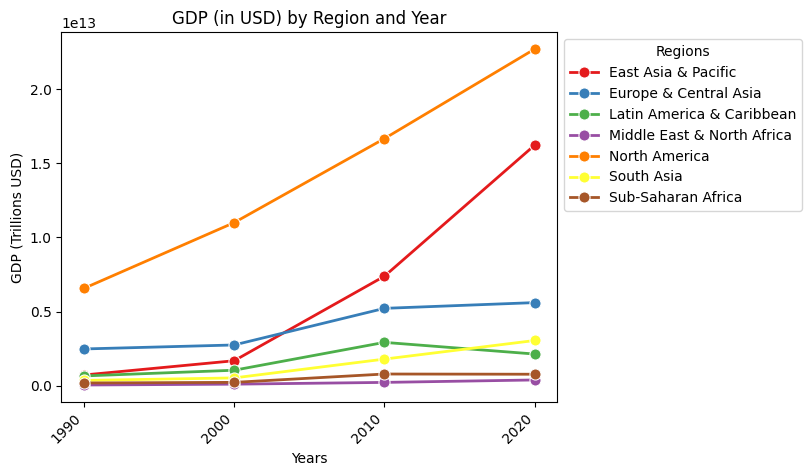

In [ ]:
#GDP for Regions by years plot

dfGDPregion = pd.melt(time_series_ts,id_vars=['Region','Indicator Name'],value_vars=[str(x) for x in range(1990,2021,10)])
dfGDPregion = dfGDPregion.groupby(['Region','variable'])['value'].sum().reset_index()
defs = dfGDPregion.pivot(index='Region',columns='variable',values='value')
plt.xlabel('Year')
plt.ylabel('GDP (Trillions USD)')
plt.title('GDP (in USD) by Years')
plt.xticks(rotation=45, ha='right')

plt.legend()
# plt.grid(True)
# plt.show()
sns.lineplot(x='variable', y='value', hue='Region', data=dfGDPregion, marker='o', palette='Set1', markersize=8, linewidth=2)

plt.xlabel('Years')
plt.ylabel('GDP (Trillions USD)')
plt.title('GDP (in USD) by Region and Year')

plt.legend(title='Regions', bbox_to_anchor=(1, 1))
# plt.show()
plt.savefig('gdp_by_region.png',bbox_inches='tight')

In [ ]:
#NEW SECTION -- CREATING NEW VISUALIZATIONS FOR THE REST OF THE PAPER

totalPopulation = dfCountry.loc[pd.IndexSlice[:,:,:,:,('SP.POP.TOTL'),:], :]

growthPopulation = dfCountry.loc[pd.IndexSlice[:,:,:,:,('SP.POP.GROW'),:], :]

urbanPopulation = dfCountry.loc[pd.IndexSlice[:,:,:,:,('SP.URB.TOTL.IN.ZS'),:], :]

CapitaGDP = dfCountry.loc[pd.IndexSlice[:,:,:,:,('NY.GDP.PCAP.CD'),:], :]

energy = dfCountry.loc[pd.IndexSlice[:,:,:,:,('EG.USE.ELEC.KH.PC'),:], :]

energySources = dfCountry.loc[pd.IndexSlice[('United States','China','India','Nigeria','Bangladesh'),:,:,:,('EG.ELC.PETR.ZS','EG.ELC.NGAS.ZS','EG.ELC.COAL.ZS'),:], :]

forestLand = dfCountry.loc[pd.IndexSlice[:,:,:,:,('AG.LND.FRST.K2'),:], :]

dfgreenhouse = dfCountry.loc[pd.IndexSlice[:,:,:,:,('EN.ATM.GHGT.KT.CE'),:], :]


In [ ]:
totalPopulation = totalPopulation.reset_index()
growthPopulation = growthPopulation.reset_index()
urbanPopulation = urbanPopulation.reset_index()
CapitaGDP.reset_index(inplace=True)
energy.reset_index(inplace=True)
energySources.reset_index(inplace=True)
dfgreenhouse.reset_index(inplace=True)
forestLand.reset_index(inplace=True)

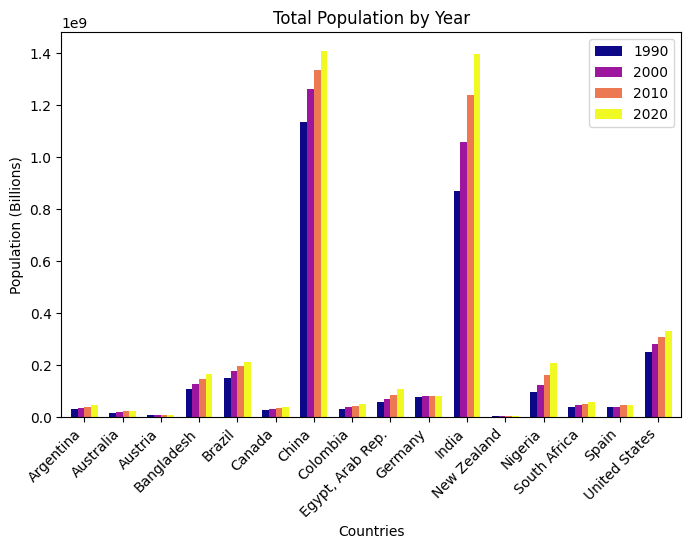

In [ ]:
#GDP for Countries by years plot

dfPopTotal = pd.melt(totalPopulation,id_vars=['Country Name','Indicator Name'],value_vars=[str(x) for x in range(1990,2021,10)])
# dfPopGrowth = dfPopGrowth.groupby(['Country Name','variable'])['value'].sum().reset_index()
dfPopTotal.pivot(index=['Country Name'],columns='variable',values='value').plot(kind='bar',width=0.7,figsize=(8,5),colormap='plasma')

plt.xlabel('Countries')
plt.ylabel('Population (Billions)')
plt.title('Total Population by Year')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.savefig('population_total.png',bbox_inches='tight')
plt.show()

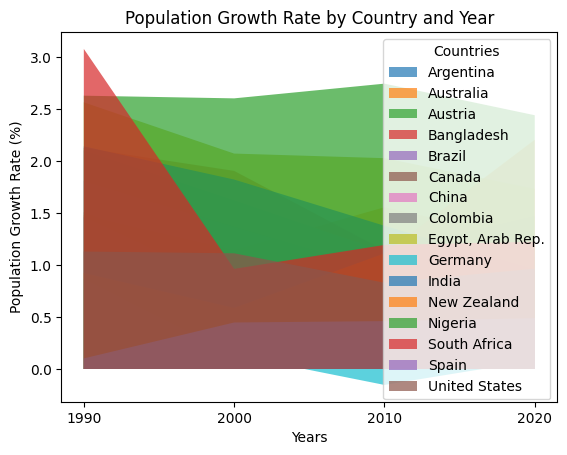

In [ ]:
dfPopGrowth = pd.melt(growthPopulation,id_vars=['Country Name','Indicator Name'],value_vars=[str(x) for x in range(1990,2021,10)])
PopGrowthPivot = dfPopGrowth.pivot_table(index='Country Name',columns='variable',values='value')


# Use a filled area plot
for country in PopGrowthPivot.index:
    plt.fill_between(PopGrowthPivot.columns, PopGrowthPivot.loc[country], label=country, alpha=0.7)

plt.xlabel('Years')
plt.ylabel('Population Growth Rate (%)')
plt.title('Population Growth Rate by Country and Year')

plt.legend(title='Countries', bbox_to_anchor=(1, 1))
plt.savefig('population_growth.png',bbox_inches='tight')
plt.show()

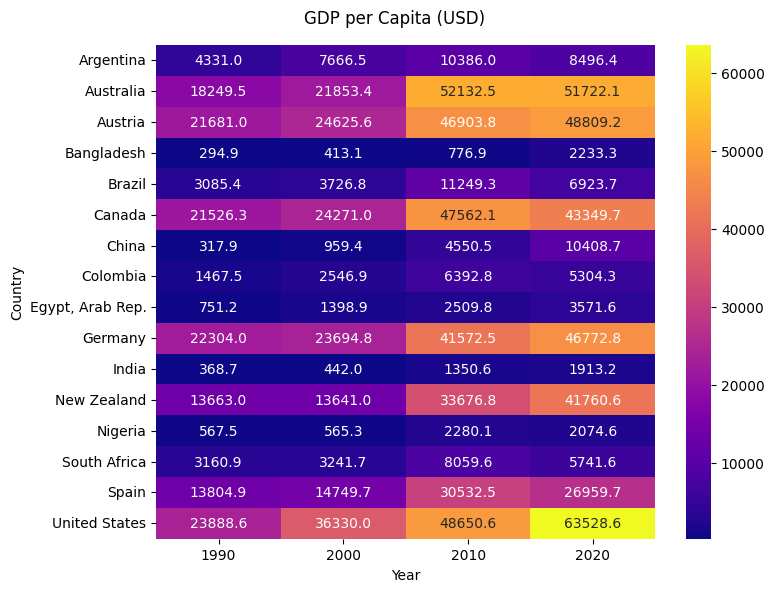

In [ ]:
dfGDPcap = pd.melt(CapitaGDP,id_vars=['Country Name','Indicator Name'],value_vars=[str(x) for x in range(1990,2021,10)])
GDPCapPivot = dfGDPcap.pivot_table(index='Country Name',columns='variable',values='value')

fig, axs = plt.subplots(figsize=(8, 6))
sns.heatmap(GDPCapPivot, annot=True, fmt=".1f", cmap="plasma")

plt.suptitle('GDP per Capita (USD)')
# axs.set_title('Heatmap')
axs.set_xlabel('Year')
axs.set_ylabel('Country')
plt.tight_layout()
plt.show()


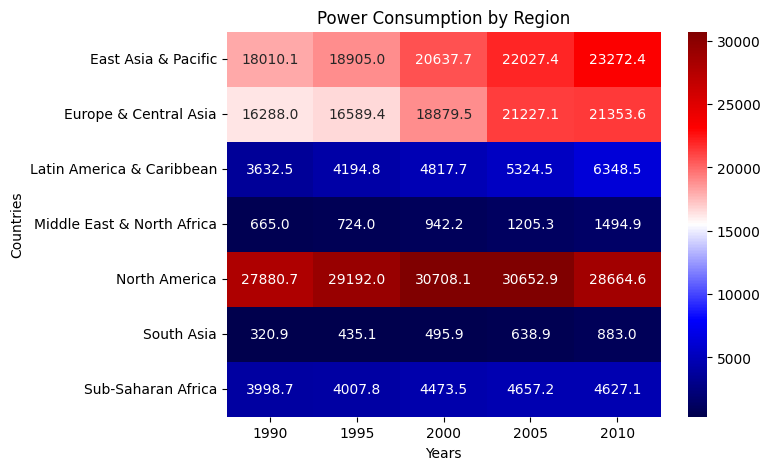

In [ ]:
cEnergy = pd.melt(energy,id_vars=['Country Name','Indicator Name','Region'],value_vars=[str(x) for x in range(1990,2015,5)])
cEnergy = cEnergy.groupby(['Region','variable'])['value'].sum().reset_index()
EnergyPivot = cEnergy.pivot_table(index='Region',columns='variable',values='value')

plt.figure(figsize=(7,5))

years = EnergyPivot.columns
values = EnergyPivot.values
pallete = sns.color_palette('Spectral', 9)

sns.heatmap(EnergyPivot, annot=True, fmt=".1f", cmap="seismic")
plt.xlabel('Years')
plt.ylabel('Countries')
plt.title('Power Consumption by Region')

plt.savefig('power.png',bbox_inches='tight')





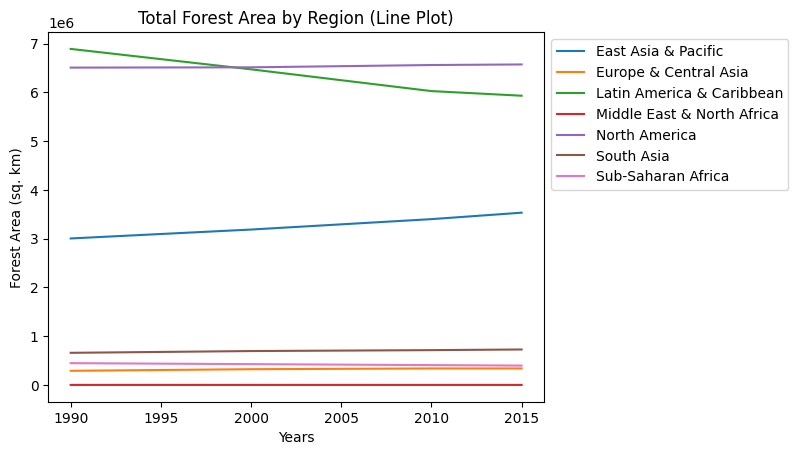

In [ ]:
dfForest = pd.melt(forestLand,id_vars=['Country Name','Indicator Name','Region'],value_vars=[str(x) for x in range(1990,2016,5)])
dfForest = dfForest.groupby(['Region','variable'])['value'].sum().reset_index()
forestPivot = dfForest.pivot_table(index='Region',columns='variable',values='value')

for region in forestPivot.index:
    plt.plot(forestPivot.columns, forestPivot.loc[region], label=region)

plt.xlabel('Years')
plt.ylabel('Forest Area (sq. km)')
plt.title('Total Forest Area by Region (Line Plot)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('forest.png',bbox_inches='tight')
plt.show()


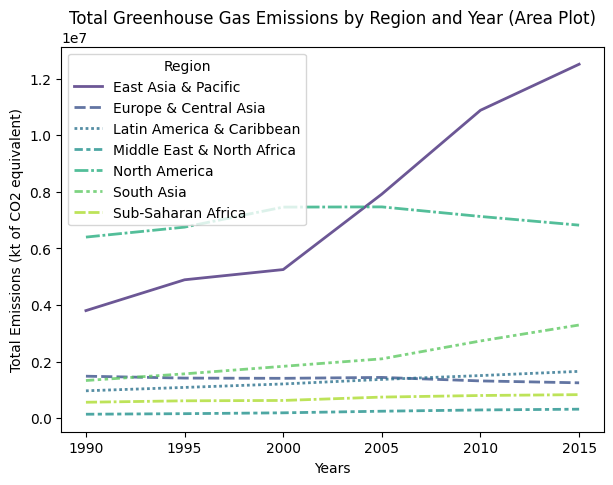

In [ ]:
dfGHG = pd.melt(dfgreenhouse,id_vars=['Country Name','Indicator Name','Region'],value_vars=[str(x) for x in range(1990,2016,5)])
dfGHG = dfGHG.groupby(['Region','variable'])['value'].sum().reset_index()
GHGPivot = dfGHG.pivot_table(index='Region',columns='variable',values='value')

plt.figure(figsize=(7,5))

years = GHGPivot.columns
values = GHGPivot.values

pallete = sns.color_palette('Spectral', 7)



palette = sns.color_palette('viridis', n_colors=len(GHGPivot.index))
sns.lineplot(data=GHGPivot.T, palette=palette, lw=2, alpha=0.8)

plt.xlabel('Years')
plt.ylabel('Total Emissions (kt of CO2 equivalent)')
plt.title('Total Greenhouse Gas Emissions by Region and Year (Area Plot)')
plt.savefig('greenhouse.png',bbox_inches='tight')
plt.show()
